

**Uncovering Tesla’s Operational Pulse Through Data**



In [ ]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [ ]:
#  Load Excel Files
products_df = pd.read_excel('/content/tesla_operations_products.xlsx')
customers_df = pd.read_excel('/content/tesla_operations_customers.xlsx')
orders_df = pd.read_excel('/content/tesla_operations_orders.xlsx')


In [ ]:
#  Merge DataFrames
merged_df = orders_df.merge(products_df, on='product_id', how='left')
merged_df = merged_df.merge(customers_df, on='customer_id', how='left')

In [ ]:
#  Convert Dates
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])
merged_df['dispatch_date'] = pd.to_datetime(merged_df['dispatch_date'])
merged_df['delivery_date'] = pd.to_datetime(merged_df['delivery_date'])
merged_df['registered_date'] = pd.to_datetime(merged_df['registered_date'])

In [ ]:
#  Create Derived Columns
merged_df['dispatch_delay'] = (merged_df['dispatch_date'] - merged_df['order_date']).dt.days
merged_df['delivery_delay_vs_expected'] = pd.to_numeric(
    merged_df['actual_delivery_days'] - merged_df['expected_delivery_days'], errors='coerce')
merged_df['customer_age_days'] = (pd.to_datetime('today') - merged_df['registered_date']).dt.days


In [ ]:
#  Precomputed Metrics
# 1. Average delivery delay
avg_delay = merged_df['delivery_delay_vs_expected'].mean()

# 2. Total revenue by product category (descending)
revenue_by_category = merged_df.groupby('category')['total_amount'].sum().sort_values(ascending=False)

# 3. Average delivery days by delivery method (ascending)
delivery_by_method = merged_df.groupby('delivery_method')['actual_delivery_days'].mean().sort_values()

# 4. Orders count by warehouse location
orders_by_warehouse = merged_df['warehouse_location'].value_counts()

# 5. Top 10 states by total revenue
revenue_by_state = merged_df.groupby('state')['total_amount'].sum().sort_values(ascending=False).head(10)

# 6. Average spend by customer age group (New, Loyal, Veteran)
spend_by_customer_age = merged_df.groupby(
    pd.cut(
        merged_df['customer_age_days'],
        bins=[0, 180, 730, np.inf],
        labels=['New', 'Loyal', 'Veteran']
    ),
    observed=True  # ✅ Added to suppress FutureWarning
)['total_amount'].mean()

Q1 Delivery Delay Histogram

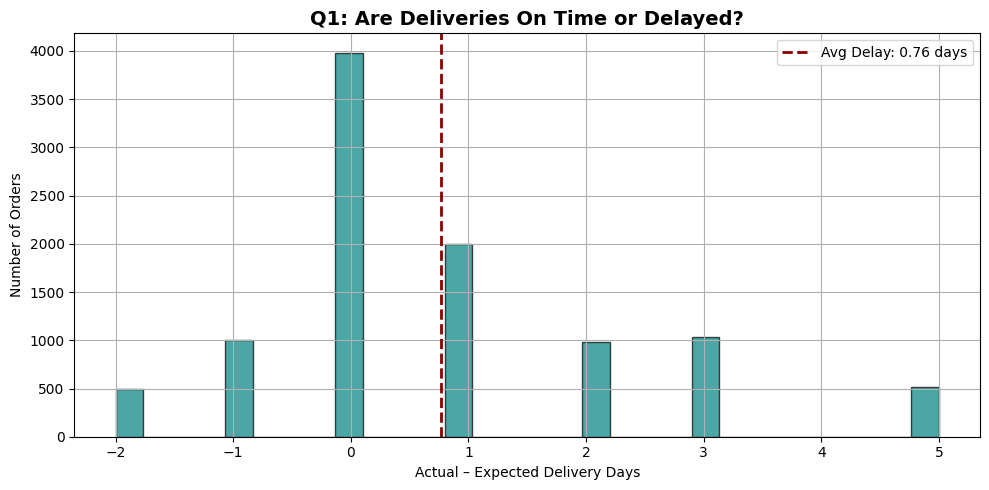

In [ ]:

clean_delay = pd.to_numeric(merged_df['delivery_delay_vs_expected'], errors='coerce').dropna()

plt.figure(figsize=(10, 5))
plt.hist(clean_delay, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.axvline(avg_delay, color='darkred', linestyle='--', linewidth=2, label=f'Avg Delay: {avg_delay:.2f} days')
plt.title('Q1: Are Deliveries On Time or Delayed?', fontsize=14, weight='bold')
plt.xlabel('Actual – Expected Delivery Days')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Q3: Average Delivery Time by Method

<ipython-input-15-bc0b560c45e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_by_method.values, y=delivery_by_method.index, palette="Set3")


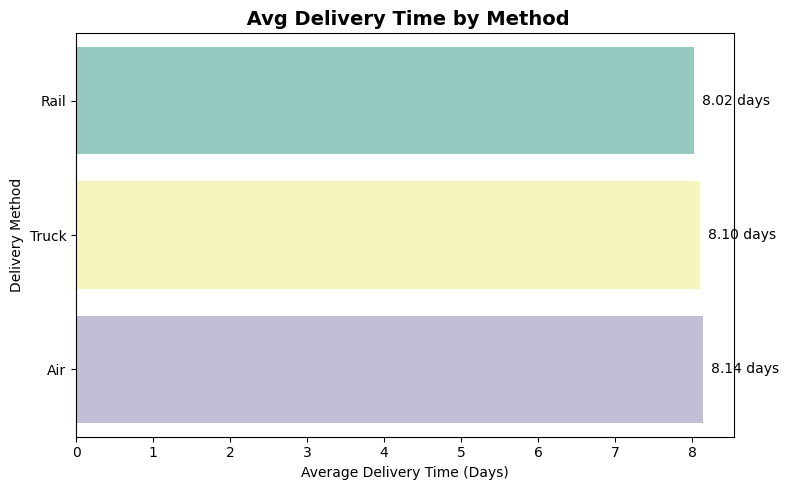

In [ ]:

plt.figure(figsize=(8, 5))
sns.barplot(x=delivery_by_method.values, y=delivery_by_method.index, palette="Set3")

for i, v in enumerate(delivery_by_method.values):
    plt.text(v + 0.1, i, f'{v:.2f} days', va='center', fontsize=10)

plt.title(" Avg Delivery Time by Method", fontsize=14, weight='bold')
plt.xlabel("Average Delivery Time (Days)")
plt.ylabel("Delivery Method")
plt.tight_layout()
plt.show()


 Order Volume by Warehouse

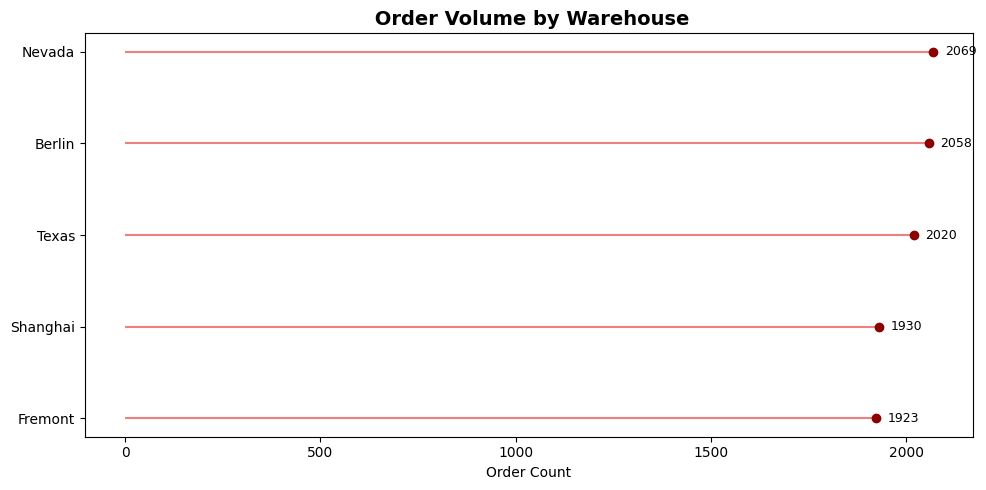

In [ ]:

plt.figure(figsize=(10, 5))
sorted_warehouses = orders_by_warehouse.sort_values()

plt.hlines(y=sorted_warehouses.index, xmin=0, xmax=sorted_warehouses.values, color='lightcoral')
plt.plot(sorted_warehouses.values, sorted_warehouses.index, "o", color='darkred')

for index, value in enumerate(sorted_warehouses.values):
    plt.text(value + 30, index, str(value), va='center', fontsize=9)

plt.title(" Order Volume by Warehouse", fontsize=14, weight='bold')
plt.xlabel("Order Count")
plt.tight_layout()
plt.show()


 Revenue by State

<ipython-input-17-5ef504bcba20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_state.values, y=revenue_by_state.index, palette=palette)


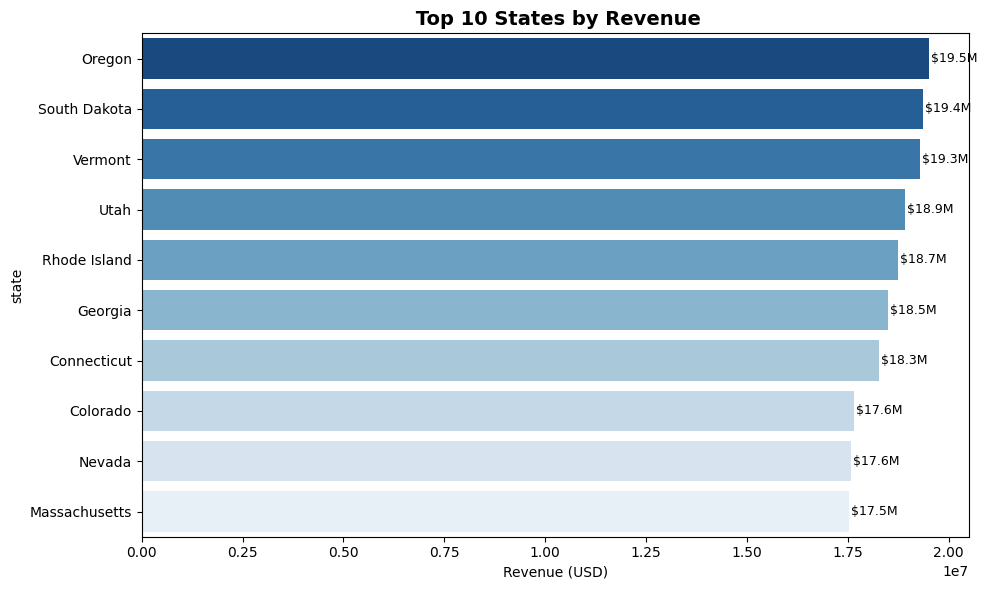

In [ ]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Blues_r", n_colors=len(revenue_by_state))

sns.barplot(x=revenue_by_state.values, y=revenue_by_state.index, palette=palette)

for i, v in enumerate(revenue_by_state.values):
    plt.text(v + 50000, i, f"${v/1e6:.1f}M", va='center', fontsize=9)

plt.title(" Top 10 States by Revenue", fontsize=14, weight='bold')
plt.xlabel("Revenue (USD)")
plt.tight_layout()
plt.show()

Avg Spend by Customer Segment

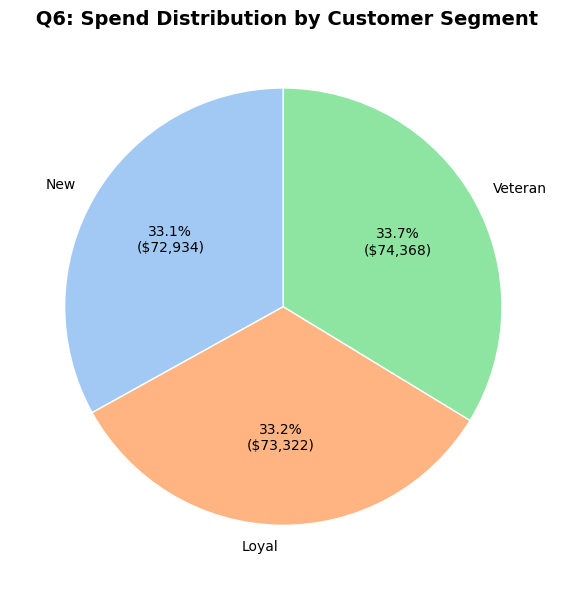

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Data from pre-computed groupby result
segments = spend_by_customer_age.index
spend = spend_by_customer_age.values

# Create pie chart
plt.figure(figsize=(7, 6))
colors = sns.color_palette("pastel")

plt.pie(spend,
        labels=segments,
        autopct=lambda pct: f'{pct:.1f}%\n(${int(pct/100 * spend.sum()):,})',
        startangle=90,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

plt.title(" Q6: Spend Distribution by Customer Segment", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()



In [ ]:
pip install panel


In [ ]:
!pip install panel jupyter_bokeh


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import pandas as pd
import numpy as np
import panel as pn
import plotly.express as px
pn.extension('plotly')

# Load your data
products_df = pd.read_excel('/tesla_operations_products.xlsx')
customers_df = pd.read_excel('/tesla_operations_customers.xlsx')
orders_df = pd.read_excel('/tesla_operations_orders.xlsx')


# Merge and derive columns
merged_df = orders_df.merge(products_df, on='product_id').merge(customers_df, on='customer_id')
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])
merged_df['dispatch_date'] = pd.to_datetime(merged_df['dispatch_date'])
merged_df['delivery_date'] = pd.to_datetime(merged_df['delivery_date'])
merged_df['registered_date'] = pd.to_datetime(merged_df['registered_date'])
merged_df['dispatch_delay'] = (merged_df['dispatch_date'] - merged_df['order_date']).dt.days
merged_df['delivery_delay_vs_expected'] = merged_df['actual_delivery_days'] - merged_df['expected_delivery_days']
merged_df['customer_age_days'] = (pd.to_datetime('today') - merged_df['registered_date']).dt.days

# Precompute metrics
avg_delay = merged_df['delivery_delay_vs_expected'].mean()
revenue_by_category = merged_df.groupby('category')['total_amount'].sum()
delivery_by_method = merged_df.groupby('delivery_method')['actual_delivery_days'].mean()
orders_by_warehouse = merged_df['warehouse_location'].value_counts()
revenue_by_state = merged_df.groupby('state')['total_amount'].sum().sort_values(ascending=False).head(10)
spend_by_customer_age = merged_df.groupby(
    pd.cut(merged_df['customer_age_days'], [0, 180, 730, np.inf], labels=['New', 'Loyal', 'Veteran'])
)['total_amount'].mean()


<ipython-input-3-4261719a2e6d>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spend_by_customer_age = merged_df.groupby(


In [ ]:
# Define interactive charts
def q1_delivery_delay():
    df = merged_df.dropna(subset=['delivery_delay_vs_expected'])
    fig = px.histogram(df, x='delivery_delay_vs_expected', nbins=30,
                       title=' Q1: Delivery Delay Distribution',
                       labels={'delivery_delay_vs_expected': 'Days Late or Early'})
    fig.add_vline(x=avg_delay, line_dash='dash', line_color='red')
    return fig

def q2_revenue_category():
    fig = px.pie(values=revenue_by_category.values,
                 names=revenue_by_category.index,
                 title=' Q2: Revenue by Product Category',
                 hole=0.3)
    return fig

def q3_delivery_method():
    fig = px.bar(x=delivery_by_method.index, y=delivery_by_method.values,
                 labels={'x': 'Delivery Method', 'y': 'Avg Days'},
                 title=' Q3: Avg Delivery Time by Method')
    return fig

def q4_warehouse_orders():
    fig = px.bar(x=orders_by_warehouse.index, y=orders_by_warehouse.values,
                 title=' Q4: Order Volume by Warehouse',
                 labels={'x': 'Warehouse', 'y': 'Order Count'})
    return fig

def q5_state_revenue():
    fig = px.bar(x=revenue_by_state.values, y=revenue_by_state.index, orientation='h',
                 title=' Q5: Top 10 States by Revenue',
                 labels={'x': 'Revenue (USD)', 'y': 'State'})
    return fig

def q6_customer_spend():
    fig = px.bar(x=spend_by_customer_age.index, y=spend_by_customer_age.values,
                 title=' Q6: Avg Spend by Customer Segment',
                 labels={'x': 'Segment', 'y': 'Avg Spend'})
    return fig


In [ ]:
# Define interactive charts
def q1_delivery_delay():
    df = merged_df.dropna(subset=['delivery_delay_vs_expected'])
    fig = px.histogram(df, x='delivery_delay_vs_expected', nbins=30,
                       title=' Q1: Delivery Delay Distribution',
                       labels={'delivery_delay_vs_expected': 'Days Late or Early'})
    fig.add_vline(x=avg_delay, line_dash='dash', line_color='red')
    return fig

def q2_revenue_category():
    fig = px.pie(values=revenue_by_category.values,
                 names=revenue_by_category.index,
                 title=' Q2: Revenue by Product Category',
                 hole=0.3)
    return fig

def q3_delivery_method():
    fig = px.bar(x=delivery_by_method.index, y=delivery_by_method.values,
                 labels={'x': 'Delivery Method', 'y': 'Avg Days'},
                 title=' Q3: Avg Delivery Time by Method')
    return fig

def q4_warehouse_orders():
    fig = px.bar(x=orders_by_warehouse.index, y=orders_by_warehouse.values,
                 title=' Q4: Order Volume by Warehouse',
                 labels={'x': 'Warehouse', 'y': 'Order Count'})
    return fig

def q5_state_revenue():
    fig = px.bar(x=revenue_by_state.values, y=revenue_by_state.index, orientation='h',
                 title=' Q5: Top 10 States by Revenue',
                 labels={'x': 'Revenue (USD)', 'y': 'State'})
    return fig

def q6_customer_spend():
    fig = px.bar(x=spend_by_customer_age.index, y=spend_by_customer_age.values,
                 title=' Q6: Avg Spend by Customer Segment',
                 labels={'x': 'Segment', 'y': 'Avg Spend'})
    return fig


In [12]:
# Define dropdown widget
question_selector = pn.widgets.Select(
    name='Choose a Question',
    options={
        'Q1: Delivery Delay': q1_delivery_delay,
        'Q2: Revenue by Category': q2_revenue_category,
        'Q3: Delivery Time by Method': q3_delivery_method,
        'Q4: Orders by Warehouse': q4_warehouse_orders,
        'Q5: Revenue by State': q5_state_revenue,
        'Q6: Spend by Customer Segment': q6_customer_spend,
    }
)

# Bind selection to function
dashboard = pn.bind(lambda f: f(), question_selector)

# Layout
pn.Column("##  Tesla Operations Dashboard", question_selector, dashboard)


Column
    [0] Markdown(str)
    [1] Select(name='Choose a Question', options={'Q1: Delivery Delay': <fu...}, value=<function q1_delivery_dela...)
    [2] ParamFunction(function, _pane=Plotly, defer_load=False)